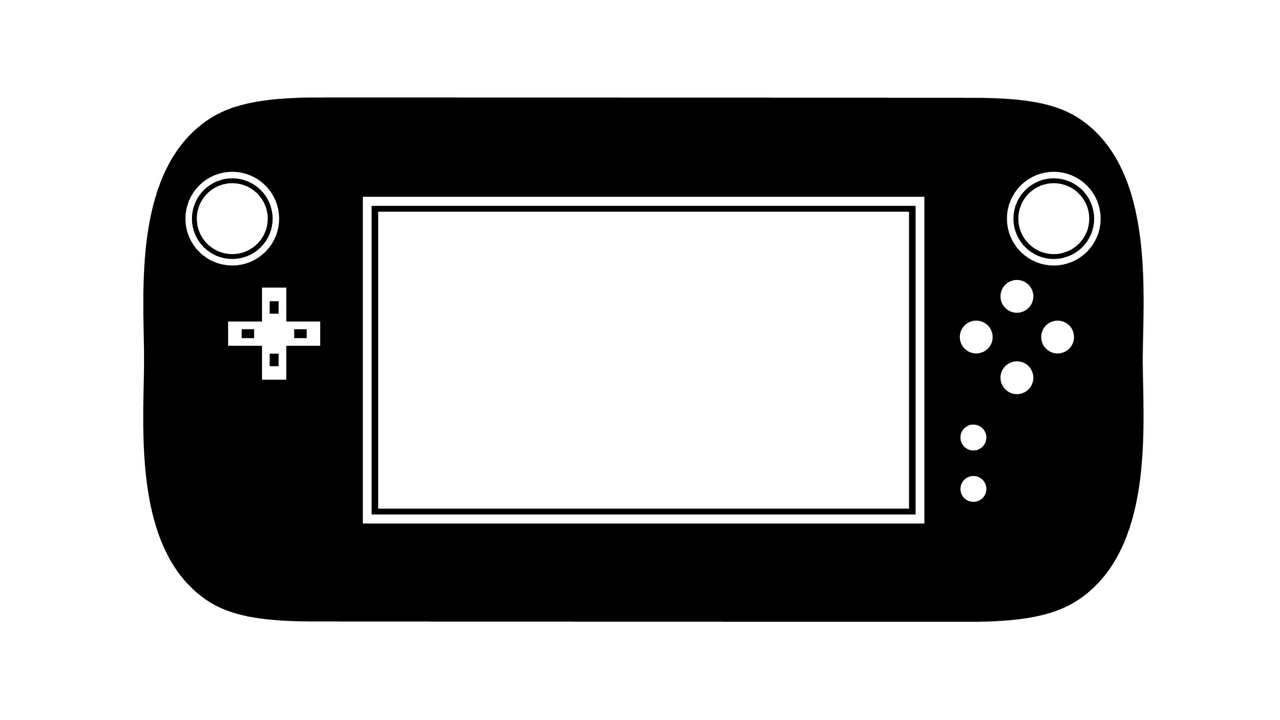

De niño recuerdo ser un activo jugador de videojuegos, me gustaba jugar juegos como el mario kart, halo, super smash, etc. Siempre disfrutaba jugar con mis amigos y pasar un buen rato juntos. Además, los videojuegos son una industria que en todos los estudios es considerada como una de las que más dinero genera, incluso superando a Hollywood. Por esas razones me decidí a hacer este proyecto sobre las ventas de videojuegos en diversas regiones del mundo y a nivel mundial. 

En este proyecto me concentraré en analizar cúales son los géneros de videojuegos que más se venden a nivel mundial, cúales son las empresas que más ventas tienen en esta industria y las consolas de videojuegos en las que se vendern más videojuegos.

Debido al gran crecimiento y potencial económico de esta industria, decidí realizar mi proyecto de visualización con un dataset sobre las ventas de diversos videojuegos a través de los años. Con este proyecto busco conocer cúales son los videojuegos con mayores ventas, las empresas que más ventas han logrado en la industria y las consolas que más se venden en el mercado

Este dataset contiene una lista con más de diez mil nombres de juegos, los campos incluyen:


    *Rank - El ranking de los juegos más vendidos
    *Name - El nombre del juego
    *Platform - Consola del juego(Wii, Xbox, etc)
    *Year - Año en que se lanzó el juego
    *Genre - Género del videojuego
    *Publisher - Compañía que lanza el juego
    *NA_Sales - Ventas en Norteamérica(en millones)
    *EU_Sales - Ventas en Europa(en millones)
    *JP - Ventas en Japón(en millones)
    *Other_Sales - Ventas en el resto del mundo (en millones)
    *Global_Sales - Total de ventas en el mundo(en millones)

In [ ]:
#importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots


### Cargar los datos

In [ ]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')


## Dimensiones y tipo de datos

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

### Dimensiones(renglones, columnas)

In [ ]:
df.shape

### Tipo de dato de cada columna

In [ ]:
df.dtypes

In [ ]:
df.describe()

### Valores ausentes

In [ ]:
df.isnull().sum()

In [ ]:
VFalt = round(df.isnull().sum()/len(df)*100,3)
VFalt = VFalt.astype(str)+"%"
VFalt

Observamos que en las variables "Year" y "Publisher" obtuvimos valores nulos, proseguiré a eliminarlos.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Eliminamos todos los valores nulos

In [ ]:
df.dtypes

In [ ]:
fig = go.Figure()
fig = make_subplots(rows=4, 
                    cols=2, 
                    subplot_titles=("Histogram Rank",
                                    "Histogram Year", 
                                    "Histogram NA Sales",
                                    "Histogram EU Sales",
                                    "Histogram JP Sales",
                                    "Histogram Other Sales",
                                    "Histogram Global Sales"))

fig.add_trace(go.Histogram(x=df['Rank'].values), 1, 1)
fig.add_trace(go.Histogram(x=df['Year'].values), 1, 2)
fig.add_trace(go.Histogram(x=df['NA_Sales'].values), 2, 1)
fig.add_trace(go.Histogram(x=df['EU_Sales'].values), 2, 2)
fig.add_trace(go.Histogram(x=df['JP_Sales'].values), 3, 1)
fig.add_trace(go.Histogram(x=df['Other_Sales'].values), 3, 2)
fig.add_trace(go.Histogram(x=df['Global_Sales'].values), 4, 1)

fig.update_layout(showlegend=False, title_text="Datos venta de videojuegos ")

fig.show()

Hacemos las gráficas correspondientes a las variables númericas del dataset, por las gráficas podemos notar la gran mayoría de las ventas tanto a nivel global como en cada una de las regiones no pasa del número 1(en millones).

In [ ]:
s1 = df[df['NA_Sales'] < 1]
s2 = df[df['EU_Sales'] < 1]
s3 = df[df['JP_Sales'] < 1]
s4 = df[df['Other_Sales'] < 1]
s5 = df[df['Global_Sales'] < 1]

Cree 5 nuevos datasets a partir de las ventas en cada región que son menores a 1 millón

In [ ]:
fig = go.Figure()
fig = make_subplots(rows=3, 
                    cols=2, 
                    subplot_titles=("Histogram NA Sales",
                                    "Histogram EU Sales",
                                    "Histogram JP Sales",
                                    "Histogram Other Sales",
                                    "Histogram Global Sales"))

fig.add_trace(go.Histogram(x=s1['NA_Sales'].values), 1, 1)
fig.add_trace(go.Histogram(x=s2['EU_Sales'].values), 1, 2)
fig.add_trace(go.Histogram(x=s3['JP_Sales'].values), 2, 1)
fig.add_trace(go.Histogram(x=s4['Other_Sales'].values), 2, 2)
fig.add_trace(go.Histogram(x=s5['Global_Sales'].values), 3, 1)

fig.update_layout(showlegend=False, title_text="Venta de videojuegos ")

fig.show()

Como podemos observar en todas las regiones la mayoría de los videojuegos no superan el millón de ventas

In [ ]:
fig = go.Figure()
fig = make_subplots(rows=2, 
                    cols=2, 
                    subplot_titles=("Gráfica Nombre", 
                                    "Gráfica Plataforma", 
                                    "Gráfica Género",
                                    "Gráfica Empresa"))

#Nombre 
NameCount = df["Name"].value_counts().head(5)
NameV = NameCount.index.unique()
fig.add_trace(go.Bar(x=NameV, y = NameCount, text=NameCount), 1, 1)

#Plataforma
PCount = df["Platform"].value_counts().head(5)
PV = PCount.index.unique()
fig.add_trace(go.Bar(x=PV, y = PCount, text=PCount), 1, 2)

#Género
GCount = df["Genre"].value_counts().head(5)
GV = GCount.index.unique()
fig.add_trace(go.Bar(x=GV, y = GCount, text=GCount), 2, 1)

#Empresa
ECount = df["Publisher"].value_counts().head(5)
EV = ECount.index.unique()
fig.add_trace(go.Bar(x=EV, y = ECount, text=ECount), 2, 2)

fig.update_traces(texttemplate='%{text}', 
                  textposition='auto')
fig.update_yaxes(automargin=True)
fig.update_layout(height=1000, 
                  width=1050,
                  showlegend=False, 
                  uniformtext_minsize=2, 
                  uniformtext_mode='hide',
                  title_text="Ventas de videojuegos gráficas de barras ")
fig.show()

Realizamos las gráficas correspondientes a las variables tipo objeto del dataset

## Preguntas para responder

In [ ]:
df.head(5)

Ya que el dataset esta ordenado de mayor a menor respecto a las ventas, estos serían los 5 juegos más vendidos

In [ ]:
df.tail(5)

Ya que el dataset esta ordenado de mayor a menor respecto a las ventas, estos serían los 5 juegos menos vendidos

## Género de videojuegos con más ventas

In [ ]:
gventas =  df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
gventas = gventas.reset_index()
gventas.drop("index",axis = 1,inplace=True)

In [ ]:
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=gventas['Genre'][:5],
           y=gventas['Global_Sales'][:5],
           name="Top 5",
          marker={'color': gventas['Global_Sales'][:5],'colorscale': 'Oranges'}))
fig.add_trace(
    go.Bar(x=gventas['Genre'][:10],
           y=gventas['Global_Sales'][:10],
           name="Top 10",
           marker={'color': gventas['Global_Sales'][:10],'colorscale': 'Oranges'},
           visible=False))
fig.add_trace(
    go.Bar(x=gventas['Genre'][:20],
           y=gventas['Global_Sales'][:20],
           name="Top 20",
           marker={'color': gventas['Global_Sales'][:20],'colorscale': 'Oranges'},
           visible=False))

fig.add_trace(
    go.Bar(x=gventas['Genre'],
           y=gventas['Global_Sales'],
           name="Todos",
           marker={'color': gventas['Global_Sales'],'colorscale': 'Oranges'},
               visible=False ))
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 géneros"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 géneros"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 géneros"}]),
                dict(label="Todos",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "Todas los géneros"}]),
            ]),
        )
    ])
# Set title
fig.update_layout(
    title_text="Ventas por genero",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

Podemos observar que el género más vendido es el género de acción, seguido del de deportes, también la gráfica nos permite observar cuanto venden todos los géneros agrupandolos por 5, 10, 20 y todos los géneros

## Ventas por compañía

In [ ]:
cventas =  df.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
cventas = cventas.reset_index()
cventas.drop("index",axis = 1,inplace=True)

In [ ]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=cventas['Publisher'][:10],
           y=cventas['Global_Sales'][:10],
           name="Top 10",
          marker={'color': cventas['Global_Sales'][:10],'colorscale': 'Sunsetdark'}))
fig.add_trace(
    go.Bar(x=cventas['Publisher'][:50],
           y=cventas['Global_Sales'][:50],
           name="Top 50",
           marker={'color': cventas['Global_Sales'][:50],'colorscale': 'Sunsetdark'},
           visible=False))

fig.add_trace(
    go.Bar(x=cventas['Publisher'][:100],
           y=cventas['Global_Sales'][:100],
           name="Top 100",
           marker={'color': cventas['Global_Sales'][:100],'colorscale': 'Sunsetdark'},
           visible=False))

fig.add_trace(
    go.Bar(x=cventas['Publisher'][:500],
           y=cventas['Global_Sales'][:500],
           name="Top 500",
           marker={'color': cventas['Global_Sales'][:500],'colorscale': 'Sunsetdark'},
           visible=False))

fig.add_trace(
    go.Bar(x=cventas['Publisher'],
           y=cventas['Global_Sales'],
           name="Todas",
           marker={'color': cventas['Global_Sales'],'colorscale': 'Sunsetdark'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 empresas"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 50 empresas"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 100 empresas"}]),
                dict(label="Top 500",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 500 empresas"}]),
                dict(label="Todas",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Todas las empresas"}]),
            ]),
        )
    ])

# Titulo
fig.update_layout(
    title_text="Empresas con más ventas",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

### Ventas por consola

In [ ]:
pventas =  df.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
pventas = pventas.reset_index()
pventas.drop("index",axis = 1,inplace=True)

In [ ]:
fig = go.Figure()

# Agregar Traces

fig.add_trace(
    go.Bar(x=pventas['Platform'][:5],
           y=pventas['Global_Sales'][:5],
           name="Top 5",
          marker={'color': pventas['Global_Sales'][:5],'colorscale': 'Bluered'}))
fig.add_trace(
    go.Bar(x=pventas['Platform'][:10],
           y=pventas['Global_Sales'][:10],
           name="Top 10",
           marker={'color': pventas['Global_Sales'][:10],'colorscale': 'Bluered'},
           visible=False))
fig.add_trace(
    go.Bar(x=pventas['Platform'][:20],
           y=pventas['Global_Sales'][:20],
           name="Top 20",
           marker={'color': pventas['Global_Sales'][:20],'colorscale': 'Bluered'},
           visible=False))

fig.add_trace(
    go.Bar(x=pventas['Platform'],
           y=pventas['Global_Sales'],
           name="Todas",
           marker={'color': pventas['Global_Sales'],'colorscale': 'Bluered'},
               visible=False ))
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 Consolas"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 Consolas"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 Consolas"}]),
                dict(label="Todas",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "Todas las consolas"}]),
            ]),
        )
    ])
# Titulo
fig.update_layout(
    title_text="Ventas por consola",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

En la gráfica podemos observar las consolas de videojuegos que tienen más videojuegos vendidos, se puede apreciar que el PS2 es la consola que más videojuegos ha vendido hasta el años 2016